<a href="https://colab.research.google.com/github/jahanshukhy/Intro-to-Machine-Learning/blob/main/HW2_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# import Housing.csv from the Drive
file_path = '/content/drive/My Drive/ML/HW2/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
housing.shape

(545, 13)

In [16]:
# Checking Null
# If there are no NULL values in the dataset, it is clean.
housing.isnull().sum()*100/housing.shape[0]

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [17]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [18]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.shape



(436, 13)

In [19]:
df_test.shape

(109, 13)

In [20]:

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']

df_newtrain = df_train[num_vars]
df_newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [21]:
df_newtest = df_test[num_vars]
df_newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
265,2880,3,1,2,1,0,0,0,0,0,1,4403000
54,6000,3,2,2,1,1,0,0,1,1,0,7350000
171,10269,3,1,1,1,0,0,0,0,1,1,5250000
244,5320,3,1,2,1,1,1,0,0,0,1,4550000
268,4950,4,1,2,1,0,0,0,1,0,0,4382000


In [22]:

y_train = df_newtrain.pop('price').values
X_train = df_newtrain
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8050,3,1,1,1,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,0,1,0,1
91,6750,2,1,1,1,1,1,0,0,2,1
118,6420,3,1,1,1,0,1,0,1,0,1
472,3630,4,1,2,1,0,0,0,0,3,0


In [23]:
y_val   = df_newtest.pop('price').values
X_val   = df_newtest
X_val.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


/tmp/ipython-input-770251490.py:22: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
/tmp/ipython-input-770251490.py:23: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))


Learning Rate = 0.1
Final theta: [9.90483427e+168 5.98506343e+172 2.95340771e+169 1.31795059e+169
 1.82509170e+169 8.97923173e+168 1.94862561e+168 3.65263277e+168
 5.49830995e+167 3.36652923e+168 8.45360462e+168 2.67477224e+168]
Final Train Loss: inf, Validation Loss: inf

Learning Rate = 0.05
Final theta: [2.95185877e+161 1.78368073e+165 8.80180549e+161 3.92778304e+161
 5.43917526e+161 2.67600883e+161 5.80733352e+160 1.08856502e+161
 1.63861747e+160 1.00329986e+161 2.51936037e+161 7.97141043e+160]
Final Train Loss: inf, Validation Loss: inf

Learning Rate = 0.01
Final theta: [9.90447588e+143 5.98484687e+147 2.95330085e+144 1.31790290e+144
 1.82502566e+144 8.97890683e+143 1.94855510e+143 3.65250060e+143
 5.49811100e+142 3.36640742e+143 8.45329874e+143 2.67467546e+143]
Final Train Loss: 11136290381971667926655872309909490129005431498651763813073611902132509050388254509181257526395834882612999670252854375931871838699660637828483931746408370826243670198903791690918750967513827804552416060

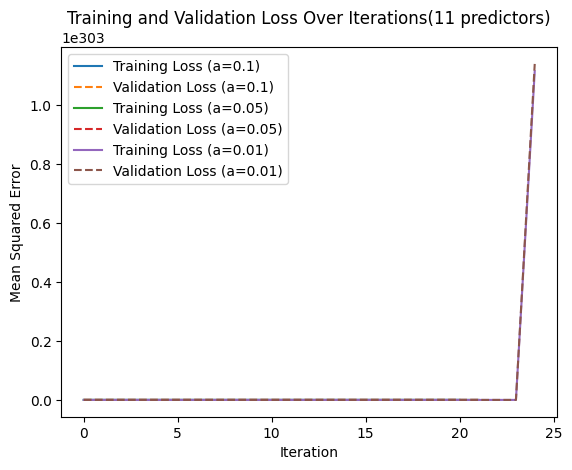

In [24]:
#Train a simple linear regression model using gradient descent
learning_rate = [0.1,0.05,0.01]
n_iterations = 25
m = len(X_train)


X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]


# initial values
for lr in learning_rate:
  theta = np.zeros(X_b_train.shape[1])

  train_losses = []
  val_losses = []

  for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= lr * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

 # Plot the training and validation loss after each iteration

  plt.plot(train_losses, label=f"Training Loss (a={lr})")
  plt.plot(val_losses, linestyle="--", label=f"Validation Loss (a={lr})")

  print(f"Learning Rate = {lr}")
  print("Final theta:", theta)
  print(f"Final Train Loss: {train_losses[-1]:.2f}, Validation Loss: {val_losses[-1]:.2f}\n")


plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations(11 predictors)")
plt.show()
